# 447 23fa exam 2 due 11:59p Fri Dec 8

***You are welcome (and encouraged) to:***
- use analytical and numerical computational tools -- specify the tool(s) in sourcecode and/or text;
- reuse example sourcecode and other materials provided in this course;
- consult textbooks, websites, and other publicly-available materials -- include full citation(s) with the URL and/or [DOI](https://en.wikipedia.org/wiki/Digital_object_identifier).

***You are not permitted to discuss the exam problems or share any part of your solutions with anyone other than the Professor or TA for this course.***
- By submitting your exam solution on Canvas, you are affirming your understanding of and adherence to these restrictions.
- We will answer questions during the class meetings Tuesday and Thursday.
- We will also answer questions posted to the Canvas Discussion board until 5p Friday.

***The exam deadline is 11:59p Friday on Canvas.***
- Final submissions received before this deadline will receive +1 bonus points.
- Everyone automatically receives a deadline extension to 11:59p Sunday. ***Further deadline extensions require prior approval.***

# standard negative feedback interconnection

This diagram, which we have studied extensively in class, is referred to by multiple problems below.

![negative feedback loop](http://faculty.washington.edu/sburden/447/447-hw1-feedback.png)

# set up environment

I suggest evaluating these cells each time you open the notebook.

In [2]:
from _447 import *

In [13]:
!pip install control
import control as ctrl

# problem 1

Design a stabilizing estimator-based controller for the following system:
$$ \dot{x} = \left(\begin{matrix} -1 & 0 \\ 1 & 0 \end{matrix}\right) x + \left(\begin{matrix} 2 \\ 1 \end{matrix}\right) u,\ y = \left(\begin{matrix} 0 & 1 \end{matrix}\right) x. $$
Specify the $K$ and $L$ matrices and implement a simulation of the closed-loop system to confirm the trajectories behave as you expect.

# problem 2

Consider a second-order process model
$$ P(s) = \frac{b}{\left(s + a_{1}\right) \left(s + a_{2}\right)}. $$

In the following subproblems, you are asked to consider the effect of different classes of controllers interconnected with $P$ in the standard negative feedback loop illustrated at the top of this exam.

## subproblem a

Show that you can't stabilize $P$ using proportional, integral, or derivative feedback alone by finding values for $a_1$, $a_2$ that render the closed-loop system unstable in each case.

## subproblem b

Show that you can stabilize $P$ using proportional-derivative control regardless of the values of $a_1$ and $a_2$ by finding expressions for $k_P$, $k_D$ in terms of $a_1$ and $a_2$ that make the closed-loop system stable.

# problem 3

Consider the simplified model for an inverted pendulum from lecture, 
$$
m \ell^2 \ddot{q} = m g \ell \sin q - \alpha\dot{q} + \ell u \cos q
$$
where
$q$ is the pendulum angle,
$\alpha > 0$ is a coefficient of rotational friction,
$\ell > 0$ is the length of the pendulum rod,
$g > 0$ is the acceleration due to gravity,
and $u$ is the horizontal acceleration of the pivot point.

<span style="color:blue">
Use parameter values 
$m = 1$ kg, 
$\ell = 0.5$ m,
$g = 9.81$ m / sec$^2$,
$a = .5$.
</span>

## subproblem a

Choose an unstable equilibrium for the pendulum and design a full-state feedback controller to stabilize it; specify the equilibrium and the result of your stability test before and after applying your controller. Create phase portraits of the **nonlinear** system with and without your controller to show that it turned the unstable equilibrium into a stable equilibrium. 

*Hint:* I added a `phase_portrait` function to the `_447` module you may find helpful; if you elect to use it, I recommend calling it via `phase_portrait(f,xlim=(-2*pi,+2*pi),ylim=(-20,+20),fs=(6,3))` where `f(t,x)` is your vector field function signature.

## subproblem b

Your controller in (a) stabilizes the nonlinear system *locally* in the sense that all trajectories inialized sufficiently close to your chosen equilibrium $x_e$ will converge to $x_e$. But your controller may not stabilize your equilibrium *globally* because trajectories initialized far enough away may never converge to $x_e$. In particular, if there is another equilibrium point $\tilde{x}_e$, then (by definition) the trajectory initialized at $\tilde{x}_e$ does not converge to $x_e$. 

Determine whether there are any equilibria in the closed-loop nonlinear system other than $x_e$: if there are, specify one; if not, explain your reasoning.

# problem 4

Consider the following two state-space systems.

$$ 
\dot{x}_1 = A_1 x_1 + B_1 u_1 = \left[\begin{matrix}0 & 0 & - a_{0}\\1 & 0 & - a_{1}\\0 & 1 & - a_{2}\end{matrix}\right] x_1 
+
\left[\begin{matrix}b_{0}\\b_{1}\\b_{2}\end{matrix}\right] u_1,
\
y_1 = C_1 x_1 = \left[\begin{matrix}0 & 0 & 1\end{matrix}\right] x_1
$$
$$ 
\dot{x}_2 = A_2 x_2 + B_2 u_2 = \left[\begin{matrix}0 & 1 & 0\\0 & 0 & 1\\- a_{0} & - a_{1} & - a_{2}\end{matrix}\right] x_2 
+
\left[\begin{matrix}0\\0\\1\end{matrix}\right] u_2,
\
y_2 = C_2 x_2 = \left[\begin{matrix}b_{0} & b_{1} & b_{2}\end{matrix}\right] x_2
$$

## subproblem a

Show analytically that these state-space systems represent the same LTI transformation, <span style="color:blue">i.e. have the same transfer function.</span>

*Hint:* you may find SymPy helpful.

## subproblem b

Show that these state-space systems have the same step response using simulations with parameter values $b_0 = b_1 = b_2 = 1$ and $a_0 = 1$, $a_2 = 2$, $a_3 = 1$.

# problem 5

This is a "story problem" that will test your ability to apply the techniques learned in this class in novel ways.

> In your first week at your new job, you are tasked with designing a proportional-derivative controller $C(s) = k_P + k_D s$ to stabilize a second-order process $P(s) = \frac{b}{(s + a_1)(s + a_2)}$ in the standard feedback interconnection illustrated in the diagram at the top of this exam.

> You are given nominal values for the parameters of $b = 1$, $a_1 = -1+j$, $a_2 = -1-j$, so you know the process is unstable. Thinking back on your first week in 447, you recall that the characteristic polynomial for the closed-loop transfer function is $s^2 + (a_1+a_2+b k_D) s + a_1 a_2 + b k_P$.
Inspiration strikes as you remember learning the Routh-Hurwitz stability criteria in week 3 so that (after substituting in the given numerical values for $a$ and $b$) the closed-loop system is stable if and only if $k_P > 0$ and $k_D > 2$, so you choose $k_P = 1$ and $k_D = 2.5$.

## subproblem a

> Your boss complains that the performance is unacceptable. You know from week 4 of 447 that there are a lot of possible performance criteria, so you ask your boss for clarification. They explain that the *overshoot* and *steady-state value* of the closed-loop system's step response to disturbance $v$ are very costly: every percentage point of overshoot costs \\$1M, and every unit of steady-state value costs \\$100M.

> One of your colleagues provides helpful guidance that $k_D$ can't be increased as it would start to amplify noise and degrade performance, but says that $k_P$ could be as large as 100.

Implement a function `cost(k_P)` in Python that takes the proportional gain $k_P$ as an argument and returns the cost of that choice of gain in dollars. Plot `cost(k_P)` versus `k_P` with axis labels. Use this plot to find a value of $k_P$ that approximately minimizes the cost, and specify the cost savings relative to your initial choice for $k_P$.

*Hint:* the `step_info` in the control systems library computes overshoot, steady-state value, and several other performance statistics for a given LTI system.

## subproblem b

> One of your colleagues sends you a message explaining that the process model your boss gave you was overly simplistic. In particular, it fails to account for significant *delay* between the sensor measurements and controller computations. (Delay arises naturally, for instance, when systems are controlled in space, under water, or over poor communication networks.)

> Panic sets in momentarily as you begrudge your ivory-tower professor who failed to teach you how to design control systems in the presence of this very common real-world phenomenon. But then you take a deep breath and think creatively about how to apply what you've learned.

> <span style="color:blue">You remember that delay by time $T$ is an LTI transformation with transfer function $D(s) = e^{-sT}$, so you can add delay to the standard feedback diagram at the top of this exam by replacing the $\fbox{$-1$}$ block with $\fbox{$-D(s)$}$. Then you think it seems sensible to define *delay margin* -- analogous to gain and phase margins -- as the smallest value of $T > 0$ that makes the Nyquist plot intersect the "bad point" $-1\in\mathbb{C}$.</span>

Determine the *delay margin* for the closed-loop system. Use the original values for $k_P$ and $k_D$ and restrict to the range $0 < T < 1$.

*Hint:* I added a `nyquist_plot` function to the `_447` module you may find helpful.

## subproblem c

> Your colleague says that the delay margin you found sounds too good to be true. They'll be convinced if you show trajectories from the system when the delay is smaller and larger than your delay margin.

Implement a time-domain simulation of the closed-loop system with delay, and plot simulation trajectories for two values of delay: one smaller than the margin you found in (a), and one larger.

<span style="color:blue">*Hint*: you may find the following code useful -- it generates the step response for the closed-loop system in this problem using two methods.</span>

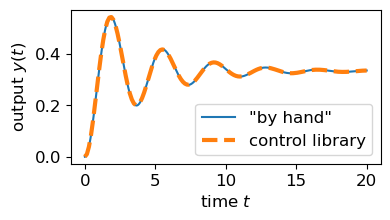

In [20]:
# parameter values
b = 1; a1 = -1-1j; a2 = -1+1j; kP = 1; kD = 2.5

# initial value, final time, timestep
y0,dy0 = 0.,0.
tf = 20
dt = 1e-3

# time samples
t_ = np.arange(0,tf,dt)

# simulate using control library
P = ctrl.TransferFunction([b],[1,a1+a2,a1*a2])
C = ctrl.TransferFunction([-kD,-kP],[1])
S = ctrl.feedback(P,C,sign=+1)
_t,_y = ctrl.step_response(S,T=tf)

# simulate "by hand"
y_ = [y0]
dy_ = [dy0]
for _ in range(t_.size): 
    y = y_[-1]
    dy = dy_[-1]
    u = - kP*y - kD*dy
    u += 1 # add "step" to control input
    ddy = b*u - (a1 + a2)*dy - a1*a2*y
    y_.append(y + dt * dy)
    dy_.append(dy + dt * ddy)
y_ = np.array(y_[:-1])
dy_ = np.array(dy_[:-1])

# plot step response
plt.figure(figsize=(4,2))
plt.plot(t_,y_,label='"by hand"');
plt.plot(_t,_y,'--',lw=3,label='control library');
plt.legend()
plt.xlabel(r'time $t$')
plt.ylabel(r'output $y(t)$');